In [ ]:
## Install dependencies and restart Runtime after installing the packages

!pip install tensorflow==2.2.0
!pip install Keras==2.4.3
!pip install numpy==1.18.5
!pip install flask==1.1.2

In [1]:
## Project: Cotton Plant Disease Prediction & Get Cure AI App - IAIP
 
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
 
keras.__version__

'2.4.3'

In [3]:
## Import and mount google drive to collect all the data stored in google drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
## get the paths for train and validate folders
train_data_path = '/content/drive/MyDrive/plant_disease/train'
validate_data_path = '/content/drive/MyDrive/plant_disease/val'

In [11]:
## we define a function to plot images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [6]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
 

In [7]:
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1961 images belonging to 4 classes.


In [8]:
## assign index to all the four classes
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [9]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validate_data_path,
                                  target_size=(150,150),
                                  batch_size=16,               ## you can increase/decrease batch size depending on ur system
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


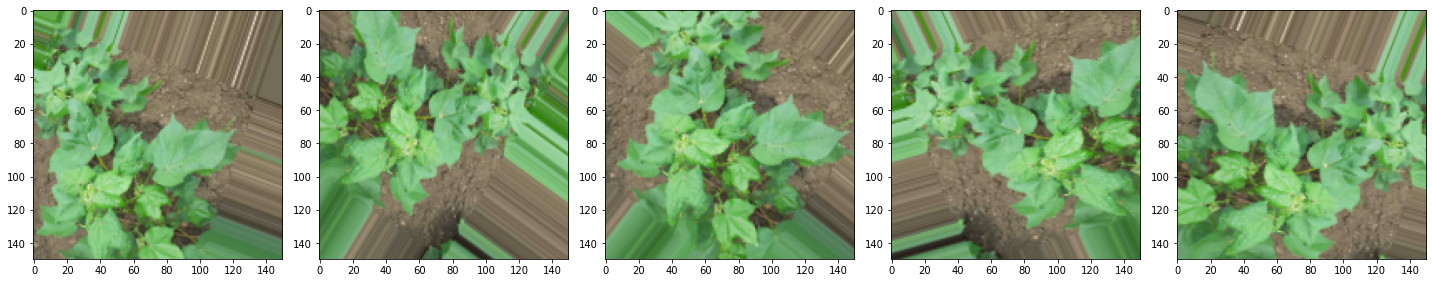

In [12]:
 ## we plot only 4 images using the images function we defined above
 
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [13]:
model_path = '/content/drive/MyDrive/plant_disease/v3_red_cott_dis.h5'         ## we give the path to save the model as h5 file 
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')  ## we call checkpoint to save the best accuracy model in each epoch
callbacks_list = [checkpoint]

In [14]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])

In [15]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train cnn model         ## gives an accuracy of more than 90 running it for 500 epochs
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,  
                          callbacks=callbacks_list)                    # time start 12:14